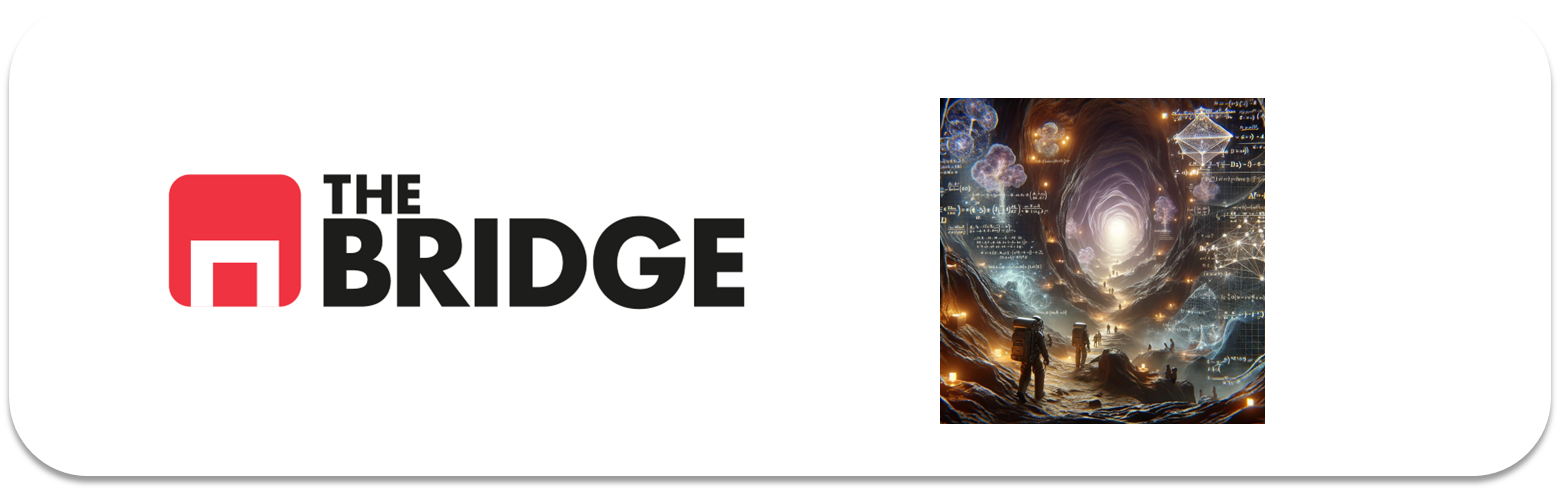

## PRACTICA OBLIGATORIA: **Introducción Deep Learning**

* La práctica obligatoria de esta unidad consiste en un único ejercicio de modelado del dataset del titanic empleando y comparando dos modelos diferentes. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [315]:
import bootcampviztools as bt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

### Descripción y objetivo

El objetivo de la práctica es crear un modelo DL y compararlo con un modelo Random Forest para el dataset de titanic los dos con el mismo objetivo, predecir la supervivencia de un pasajero.  Se pide:  
1. Desarrollar el proceso de ML hasta crear los dos modelos DL y Random Forest. El primero debe tener una topología MLP (es decir una red densa) con un máximo de 3 capas ocultas y debes emplear sklearn para crearlo. No es necesario hacer una análisis/seleccion exahustivo. Escoge una métrica acorde al tipo de target del problema. 

2. Ambos modelos deben tener sus hiperparámetros optimizados, mediante GridSearch. Para ello: utiliza el grid de parámetros que creas conveniente para Random Forest y para el modelo DL, utiliza un grid con los hiperparámetros siguientes:'hidden_layer_sizes','activation', 'solver','alpha' y 'learning_rate'. Para los rangos del grid del modelo de DL guíate por lo visto en el workout y por los posibles valores que se indican en la [documentación](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier). Prueba por lo menos una topología con una sola capa oculta y otra con más de una capa oculta.   
NOTA: Incluye los valores por defecto de los hiperparámetros escogidos en cada caso dentro del grid de hiperparámetros. 
  

3. Compara los modelos respecto a sus métricas medias de accuracy, precision, recall y tiempos de entrenamiento (para ello tendrás que realizar un entrenamiento a parte del mejor modelo obtenido en la optimización de hiperparámetros) y decide cuál te quedarías argumentándolo.    

4. Para el mejor modelo DL obtenido, muestra su clasification report, y la matriz de confusión comentando el resultado.


In [316]:
#Predecir supervivencia del pasajero
#Metrica del problema, Recall del superviviente

#1. 
#Usar DL - MLP (red densa con 3 capas)
#Usar Random Forest

#2.
#Mejorar los hiperparámetros con GridSearch
#MLP 
# hidden_layer_size, solver, alpha, learning_rate
# 1 capa oculta, y con mas de una oculta

#3. Comparar modelos, metricas, tiempos, cual escogerías.

#4. Para el mejor DL mostrar clasificación report y matriz de confusión.


## PROCEDIMIENTO

### 1. Cargar datos

In [317]:
df_sec = pd.read_csv("./data/titanic.csv")

In [318]:
df_sec.head(2)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False


In [319]:
df_sec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


In [320]:
#Quitamos la variable deck ya que tiene en su gran parte nulos
df = df_sec.copy()
df.drop(columns="deck", inplace=True)

In [321]:
#Completar los nulos de edad, en una columna nueva
df["age_edited"] = df["age"]
for i,num in enumerate(df["age_edited"]):
    if pd.isna(num):
        who_clase = df.loc[i,"who"]
        media_who = df[df["who"] == who_clase]["age"].mean()
        df.loc[i,"age_edited"] = media_who

#Eliminar columnas tratas y que dan overfitting
df.drop(columns=["age","alive"], inplace=True)

#Quitar el resto de filas con nulos
df.dropna(inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     889 non-null    int64  
 1   pclass       889 non-null    int64  
 2   sex          889 non-null    object 
 3   sibsp        889 non-null    int64  
 4   parch        889 non-null    int64  
 5   fare         889 non-null    float64
 6   embarked     889 non-null    object 
 7   class        889 non-null    object 
 8   who          889 non-null    object 
 9   adult_male   889 non-null    bool   
 10  embark_town  889 non-null    object 
 11  alone        889 non-null    bool   
 12  age_edited   889 non-null    float64
dtypes: bool(2), float64(2), int64(4), object(5)
memory usage: 85.1+ KB


### 2. Train split

In [322]:
target = "survived"

<Axes: >

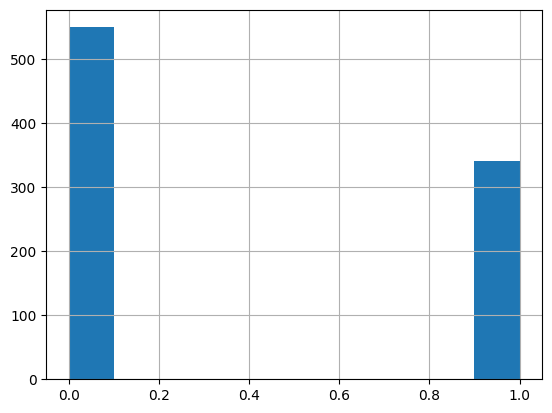

In [323]:
df[target].hist()

In [324]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [325]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8 , stratify= y, random_state=42)

### 3. MiniEDA


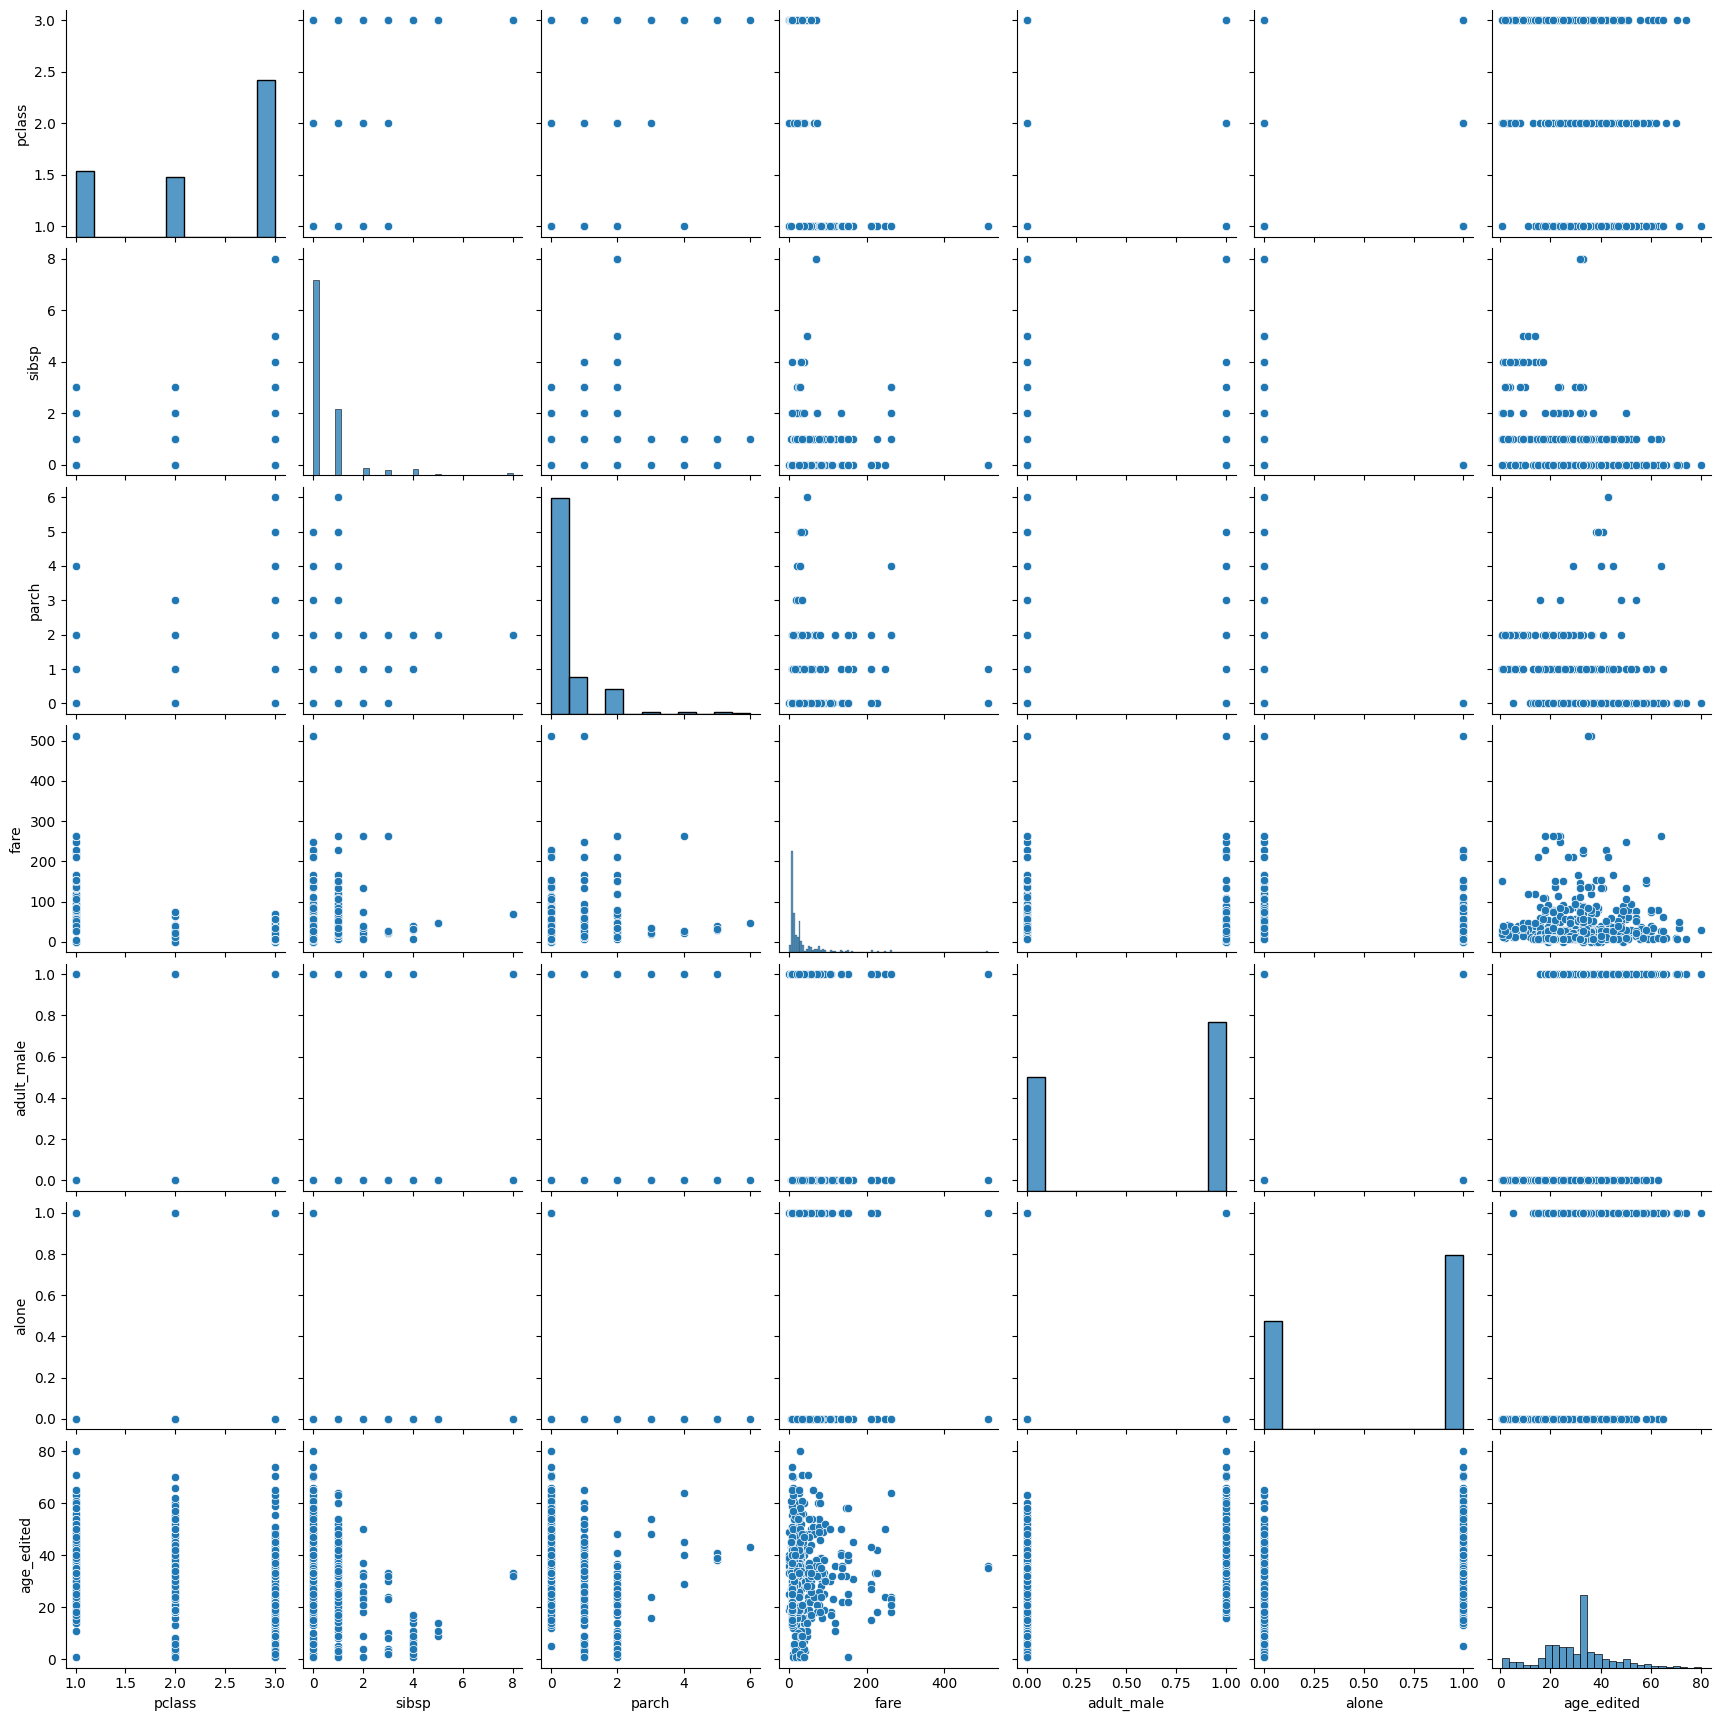

In [326]:
sns.pairplot(X_train)

### 4. Preparar features

In [327]:
#Random forest no necesita escalado ni ordinal encoder
X_train
X_test

,pclass,sex,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alone,age_edited
160,3,male,0,1,16.1000,S,Third,man,True,Southampton,False,44.000000
126,3,male,0,0,7.7500,Q,Third,man,True,Queenstown,True,33.173123
428,3,male,0,0,7.7500,Q,Third,man,True,Queenstown,True,33.173123
422,3,male,0,0,7.8750,S,Third,man,True,Southampton,True,29.000000
565,3,male,2,0,24.1500,S,Third,man,True,Southampton,False,24.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
39,3,female,1,0,11.2417,C,Third,child,False,Cherbourg,False,14.000000
91,3,male,0,0,7.8542,S,Third,man,True,Southampton,True,20.000000
883,2,male,0,0,10.5000,S,Second,man,True,Southampton,True,28.000000
853,1,female,0,1,39.4000,S,First,woman,False,Southampton,False,16.000000


In [328]:
#Para escalar tenemos que hacer un ordinal encoder
#Copia de X
X_train_encoder = X_train.copy()
X_test_encoder = X_test.copy()

#Definimos las categoricas a convertir
categoricas = X_train_encoder.select_dtypes(include=["object","bool"]).columns
categoricas

#Aplicamos el Ordinal Encoder
encoder = OrdinalEncoder()
entreno_train = encoder.fit_transform(X_train_encoder[categoricas])
entreno_test = encoder.transform(X_test_encoder[categoricas])

# Nuevas columnas en X train
for i,col in enumerate(categoricas):
    X_train_encoder[f"{col}_edited"] = entreno_train[:,i]

# Nuevas columnas en X test
for i,col in enumerate(categoricas):
    X_test_encoder[f"{col}_edited"] = entreno_test[:,i]


#Eliminar las categoricas
X_train_encoder.drop(columns=categoricas, inplace=True)
X_test_encoder.drop(columns=categoricas, inplace=True)


In [329]:
#Deep learning necesita escalado
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoder)
X_test_scaled = scaler.transform(X_test_encoder)

### 5. Diseño del modelado

In [330]:
#Aplicamos Random Forest

rf_clf = RandomForestClassifier(max_depth=2,random_state=42)
rf_clf.fit(X_train_encoder, y_train)
y_pred_rf = rf_clf.predict(X_test_encoder)

#Ver la importancia de las features
rf_features = pd.DataFrame({"Feature": X_train_encoder.columns,
                           "Importance": rf_clf.feature_importances_})
rf_features.sort_values(by="Importance")


,Feature,Importance
10,embark_town_edited,0.002233
1,sibsp,0.003164
6,embarked_edited,0.007143
2,parch,0.014945
11,alone_edited,0.020163
4,age_edited,0.025733
3,fare,0.061316
0,pclass,0.072934
7,class_edited,0.092127
8,who_edited,0.163360


In [331]:
# Imprimir el reporte de clasificación con precision, recall y F1-score
print("RANDOM FOREST \nClassification Report:")
print(classification_report(y_test, y_pred_rf))

RANDOM FOREST 
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.85      0.83       110
           1       0.74      0.66      0.70        68

    accuracy                           0.78       178
   macro avg       0.77      0.76      0.76       178
weighted avg       0.78      0.78      0.78       178



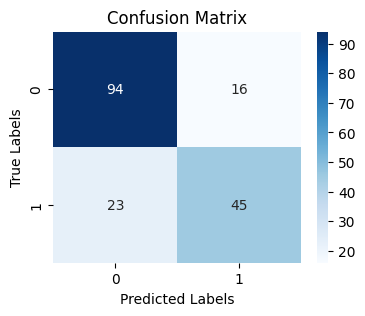

In [332]:
# Crear la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_rf)

# Visualizar la matriz de confusión
plt.figure(figsize=(4,3))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')
plt.title('Confusion Matrix')
plt.show()

In [333]:
#Deep Learning
mlp = MLPClassifier(random_state=42)
mlp.fit(X_train_scaled, y_train)
y_pred_dl = mlp.predict(X_test_scaled)

c:\Users\gema.sanz\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [334]:
# Imprimir el reporte de clasificación con precision, recall y F1-score
print("DEEP LEARNING \nClassification Report:")
print(classification_report(y_test, y_pred_dl))

DEEP LEARNING 
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.89      0.85       110
           1       0.79      0.68      0.73        68

    accuracy                           0.81       178
   macro avg       0.80      0.78      0.79       178
weighted avg       0.81      0.81      0.81       178



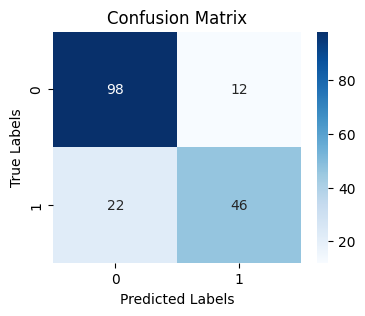

In [335]:
# Crear la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_dl)

# Visualizar la matriz de confusión
plt.figure(figsize=(4,3))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')
plt.title('Confusion Matrix')
plt.show()

### 6. Hiperparámetros

In [336]:

# Configurar GridSearchCV Random FORES
#Diccionario inicial
param_grid_rf = {
    'n_estimators': [100, 200, 300],  # Número de árboles en el bosque
    'max_depth': [None, 10, 20, 30],  # Profundidad máxima del árbol
    'min_samples_split': [2, 5, 10],  # Número mínimo de muestras requeridas para dividir un nodo
    'min_samples_leaf': [1, 2, 4],    # Número mínimo de muestras que debe tener un nodo hoja
    'max_features': ['auto', 'sqrt', 'log2']  # Número de características a considerar al buscar la mejor división
}

# Configurar GridSearchCV Random FOREST
grid_search_rf = GridSearchCV(estimator=rf_clf,
                           param_grid=param_grid_rf,
                           scoring='accuracy',  # Puedes cambiar a otra métrica si lo deseas
                           cv=5,                # Número de folds en la validación cruzada
                           verbose=2,
                           n_jobs=-1) 


grid_search_rf.fit(X_train_encoder, y_train)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


c:\Users\gema.sanz\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
363 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\gema.sanz\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\gema.sanz\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\gema.sanz\AppData\Local\Programs\Python\Python312\Lib\site-pack

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=2, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy', verbose=2)

In [337]:
# Obtener los mejores parámetros
best_params = grid_search_rf.best_params_
print("Mejores parámetros:", best_params)

# Obtener el mejor modelo
best_rf_model = grid_search_rf.best_estimator_


y_pred_rf_best = best_rf_model.predict(X_test_encoder)


Mejores parámetros: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}


In [339]:
#DEEP LEARNING
#Diccionario inicial
param_grid_dl = {
    'hidden_layer_sizes': [(50,), (100,), (100, 50), (100, 100), (50, 50, 50)],  # Más combinaciones de capas ocultas
    'solver': ['adam', 'sgd', 'lbfgs'],           # Solucionadores
    'alpha': [0.0001, 0.001, 0.01],                # Regularización L2 (coeficiente de penalización)
    'learning_rate': ['constant', 'invscaling', 'adaptive'],  # Estrategia de tasa de aprendizaje 
}

# Configurar GridSearchCV
grid_search_dl = GridSearchCV(estimator=mlp,
                           param_grid=param_grid_dl,
                           scoring='accuracy',  # Puedes cambiar a otra métrica si lo deseas
                           cv=5,                # Número de folds en la validación cruzada
                           verbose=2,
                           n_jobs=-1)

grid_search_dl.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 135 candidates, totalling 675 fits


c:\Users\gema.sanz\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


GridSearchCV(cv=5, estimator=MLPClassifier(random_state=42), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01],
                         'hidden_layer_sizes': [(50,), (100,), (100, 50),
                                                (100, 100), (50, 50, 50)],
                         'learning_rate': ['constant', 'invscaling',
                                           'adaptive'],
                         'solver': ['adam', 'sgd', 'lbfgs']},
             scoring='accuracy', verbose=2)

In [340]:
# Obtener los mejores parámetros
best_params = grid_search_dl.best_params_
print("Mejores parámetros:", best_params)

# Obtener el mejor modelo
best_mlp_model = grid_search_dl.best_estimator_

y_pred_dl_best = best_mlp_model.predict(X_test_scaled)

Mejores parámetros: {'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'constant', 'solver': 'sgd'}


### 7. Classification report & Matriz de confusion

In [341]:
# Imprimir el reporte de clasificación con precision, recall y F1-score
print("RANDOM FOREST \nClassification Report:")
print(classification_report(y_test, y_pred_rf_best))

RANDOM FOREST 
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.87      0.84       110
           1       0.76      0.66      0.71        68

    accuracy                           0.79       178
   macro avg       0.78      0.77      0.77       178
weighted avg       0.79      0.79      0.79       178



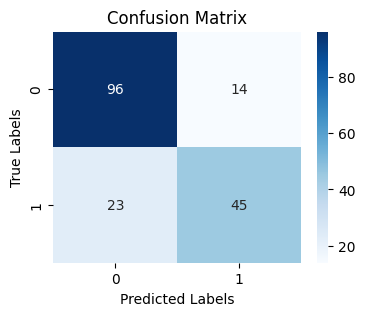

In [342]:
# Crear la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_rf_best)

# Visualizar la matriz de confusión
plt.figure(figsize=(4,3))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')
plt.title('Confusion Matrix')
plt.show()

In [343]:
# Imprimir el reporte de clasificación con precision, recall y F1-score
print("DEEP LEARNING \nClassification Report:")
print(classification_report(y_test, y_pred_dl_best))

DEEP LEARNING 
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.91      0.86       110
           1       0.82      0.68      0.74        68

    accuracy                           0.82       178
   macro avg       0.82      0.79      0.80       178
weighted avg       0.82      0.82      0.82       178



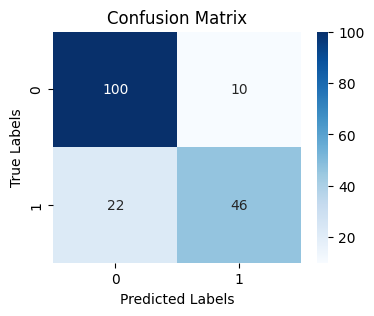

In [344]:
# Crear la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_dl_best)

# Visualizar la matriz de confusión
plt.figure(figsize=(4,3))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')
plt.title('Confusion Matrix')
plt.show()